In [1]:

pip install wfdb

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import wfdb
import ast

In [3]:
import os

In [4]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(os.path.join(path,f)) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(os.path.join(path,f)) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

In [6]:
path='/kaggle/input/ecg-data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/'
sampling_rate=100

# load and convert annotation data
Y = pd.read_csv(os.path.join(path,'ptbxl_database.csv'), index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))


In [7]:
Y.scp_codes 

ecg_id
1                 {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}
2                             {'NORM': 80.0, 'SBRAD': 0.0}
3                               {'NORM': 100.0, 'SR': 0.0}
4                               {'NORM': 100.0, 'SR': 0.0}
5                               {'NORM': 100.0, 'SR': 0.0}
                               ...                        
21833    {'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...
21834             {'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}
21835                           {'ISCAS': 50.0, 'SR': 0.0}
21836                           {'NORM': 100.0, 'SR': 0.0}
21837                           {'NORM': 100.0, 'SR': 0.0}
Name: scp_codes, Length: 21799, dtype: object

In [8]:
X = load_raw_data(Y, sampling_rate, path)

In [9]:
agg_df = pd.read_csv(os.path.join(path,'scp_statements.csv'), index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]


In [10]:
def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

In [11]:
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

In [12]:
test_fold = 10

X_train = X[np.where(Y.strat_fold != test_fold)]
y_train = Y[(Y.strat_fold != test_fold)].diagnostic_superclass

X_test = X[np.where(Y.strat_fold == test_fold)]
y_test = Y[Y.strat_fold == test_fold].diagnostic_superclass

In [19]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y_train_encoded = pd.DataFrame(mlb.fit_transform(y_train), columns=mlb.classes_)

In [20]:
y_train_encoded.head()


,CD,HYP,MI,NORM,STTC
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [21]:
pip install ecg-plot


Note: you may need to restart the kernel to use updated packages.


In [23]:
import ecg_plot


In [24]:
indices_0 = np.where(y_train_encoded['NORM'] == 0)[0] 
indices_1 = np.where(y_train_encoded['NORM'] == 1)[0]

In [25]:
X_train[indices_1[0]]

array([[-0.119, -0.055,  0.064, ..., -0.026, -0.039, -0.079],
       [-0.116, -0.051,  0.065, ..., -0.031, -0.034, -0.074],
       [-0.12 , -0.044,  0.076, ..., -0.028, -0.029, -0.069],
       ...,
       [ 0.069,  0.   , -0.069, ...,  0.024, -0.041, -0.058],
       [ 0.086,  0.004, -0.081, ...,  0.242, -0.046, -0.098],
       [ 0.022, -0.031, -0.054, ...,  0.143, -0.035, -0.12 ]])

In [26]:
single_ecg_transposed=X_train[indices_1[0]].T

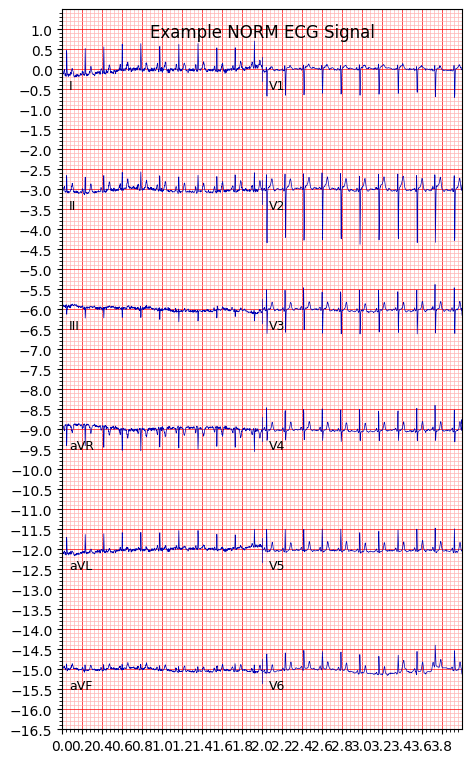

In [28]:
ecg_plot.plot(single_ecg_transposed, title="Example NORM ECG Signal")

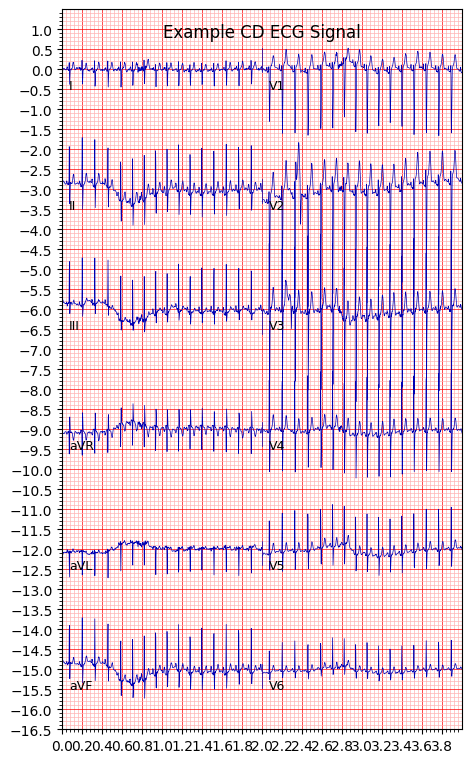

In [30]:
indices_0 = np.where(y_train_encoded['CD'] == 0)[0] 
indices_1 = np.where(y_train_encoded['CD'] == 1)[0]
single_ecg_transposed=X_train[indices_1[0]].T
ecg_plot.plot(single_ecg_transposed, title="Example CD ECG Signal")

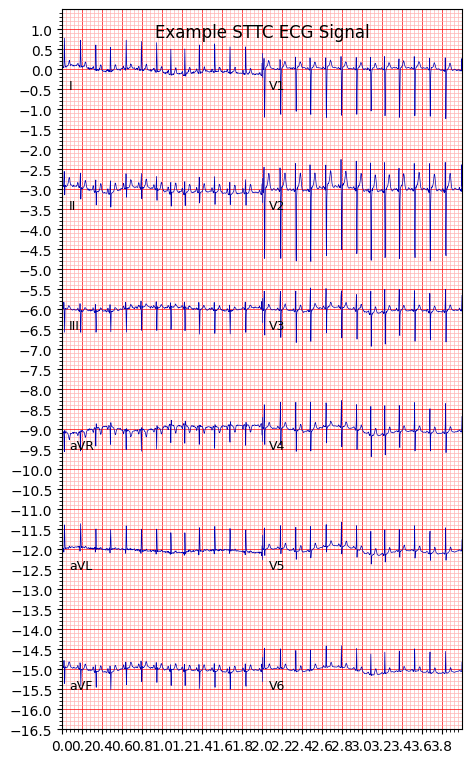

In [31]:
indices_0 = np.where(y_train_encoded['STTC'] == 0)[0] 
indices_1 = np.where(y_train_encoded['STTC'] == 1)[0]
single_ecg_transposed=X_train[indices_1[0]].T
ecg_plot.plot(single_ecg_transposed, title="Example STTC ECG Signal")

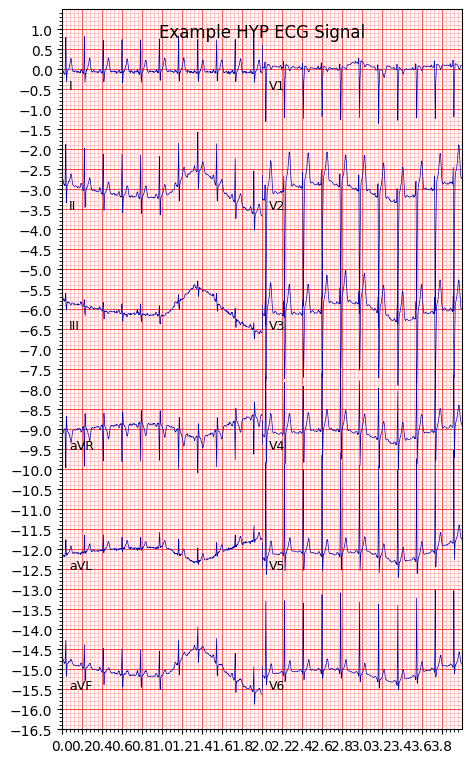

In [32]:
indices_0 = np.where(y_train_encoded['HYP'] == 0)[0] 
indices_1 = np.where(y_train_encoded['HYP'] == 1)[0]
single_ecg_transposed=X_train[indices_1[0]].T
ecg_plot.plot(single_ecg_transposed, title="Example HYP ECG Signal")

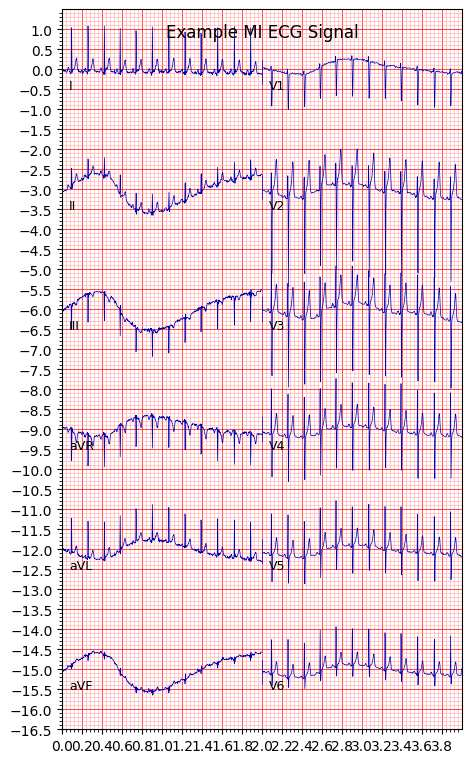

In [33]:
indices_0 = np.where(y_train_encoded['MI'] == 0)[0] 
indices_1 = np.where(y_train_encoded['MI'] == 1)[0]
single_ecg_transposed=X_train[indices_1[0]].T
ecg_plot.plot(single_ecg_transposed, title="Example MI ECG Signal")